In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("steam_reviews.csv")
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


In [3]:
# missing values
print(f"Missing values: \n{df.isna().sum()}")

Missing values: 
date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64


In [4]:
df = df.dropna()

In [5]:
# Unique number of titles
print("Unique number of titles: ", df["title"].nunique())
df["title"].value_counts()

Unique number of titles:  48


title
PLAYERUNKNOWN'S BATTLEGROUNDS                    144846
Grand Theft Auto V                                99677
Rust                                              70907
Rocket League®                                    67765
Dead by Daylight                                  22178
MONSTER HUNTER: WORLD                             18390
ASTRONEER                                          2658
The Elder Scrolls V: Skyrim Special Edition        1471
RESIDENT EVIL 2 / BIOHAZARD RE:2                   1384
Sid Meier’s Civilization® VI                        522
Euro Truck Simulator 2                              499
Slay the Spire                                      260
Terraria                                            260
Subnautica                                          247
Left 4 Dead 2                                       221
Insurgency: Sandstorm                               220
RimWorld                                            204
Garry's Mod                               

In [6]:
review_counts = (
    df["title"].value_counts().reset_index()
)  # reset_index() to convert series to df
review_counts.columns = ["game", "number of reviews"]  # renaming the columns of the df

# total number of reviews
total_reviews = review_counts["number of reviews"].sum()

# cumulative sum of reviews
review_counts["cumulative reviews"] = review_counts[
    "number of reviews"
].cumsum()  # adding a new column to the df

# cumulative percentage -> cumulative reviews / total number of reviews
review_counts["cumulative percentage"] = round(
    (review_counts["cumulative reviews"] / total_reviews) * 100, 2
)  # adding a new column to the df

# results
review_counts[["game", "number of reviews", "cumulative percentage"]].head(10)

,game,number of reviews,cumulative percentage
0,PLAYERUNKNOWN'S BATTLEGROUNDS,144846,33.42
1,Grand Theft Auto V,99677,56.42
2,Rust,70907,72.78
3,Rocket League®,67765,88.42
4,Dead by Daylight,22178,93.54
5,MONSTER HUNTER: WORLD,18390,97.78
6,ASTRONEER,2658,98.40
7,The Elder Scrolls V: Skyrim Special Edition,1471,98.73
8,RESIDENT EVIL 2 / BIOHAZARD RE:2,1384,99.05
9,Sid Meier’s Civilization® VI,522,99.17


In [7]:
df.date_posted.min(), df.date_posted.max()

('2010-12-20', '2019-02-16')

### Number of reviews across time

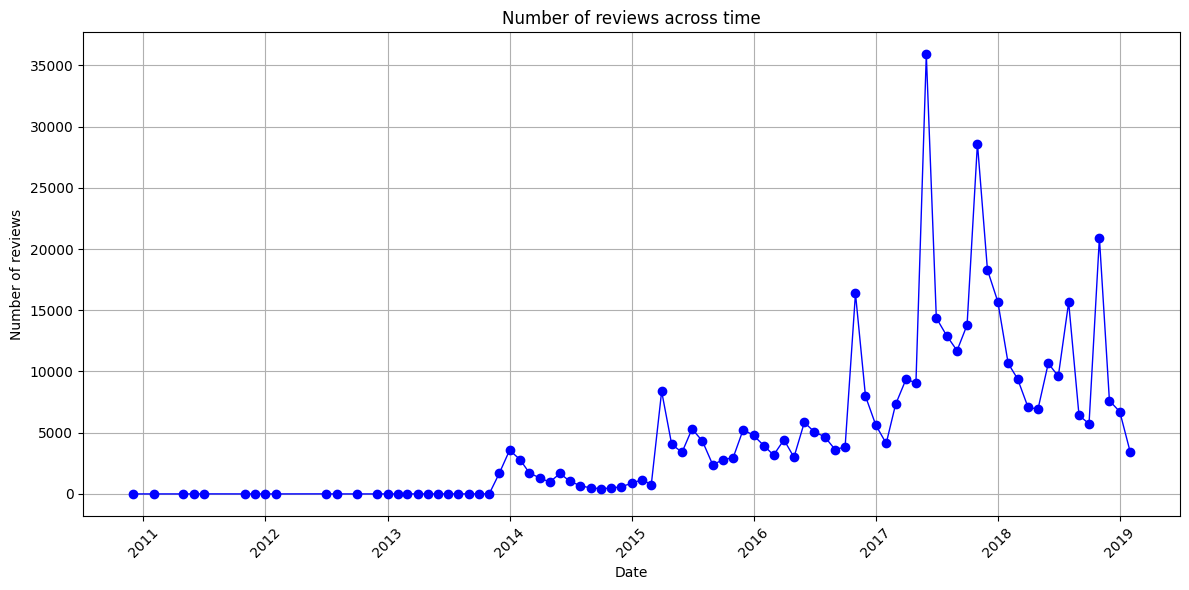

In [8]:
df["date_posted"] = pd.to_datetime(df["date_posted"])  # convert to datetime
df["year"] = df["date_posted"].dt.year
df["month"] = df["date_posted"].dt.month

# group by year and month
monthly_reviews = df.groupby(["year", "month"]).size().reset_index()
monthly_reviews.columns = ["year", "month", "number of reviews"]

# create a datetime column from year and month
monthly_reviews["date"] = pd.to_datetime(
    monthly_reviews[["year", "month"]].assign(day=1)
)

# plot
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_reviews["date"],
    monthly_reviews["number of reviews"],
    color="blue",
    marker="o",
    linestyle="-",
    linewidth=1,
)
plt.title("Number of reviews across time")
plt.xlabel("Date")
plt.ylabel("Number of reviews")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df["year"].value_counts()

year
2017    171076
2018    126363
2016     66697
2015     41623
2014     15719
2019     10160
2013      1714
2011        11
2012        11
2010         1
Name: count, dtype: int64

In [10]:
# drop duplicate rows
initial_row_count = df.shape[0]
df = df.drop_duplicates()
final_row_count = df.shape[0]

duplicates_removed = initial_row_count - final_row_count

print(f"Number of duplicate rows removed: {duplicates_removed}")

Number of duplicate rows removed: 0


In [11]:
def get_number_words(text):
    return len(text.split())


df["length_reviews"] = df["review"].apply(get_number_words)

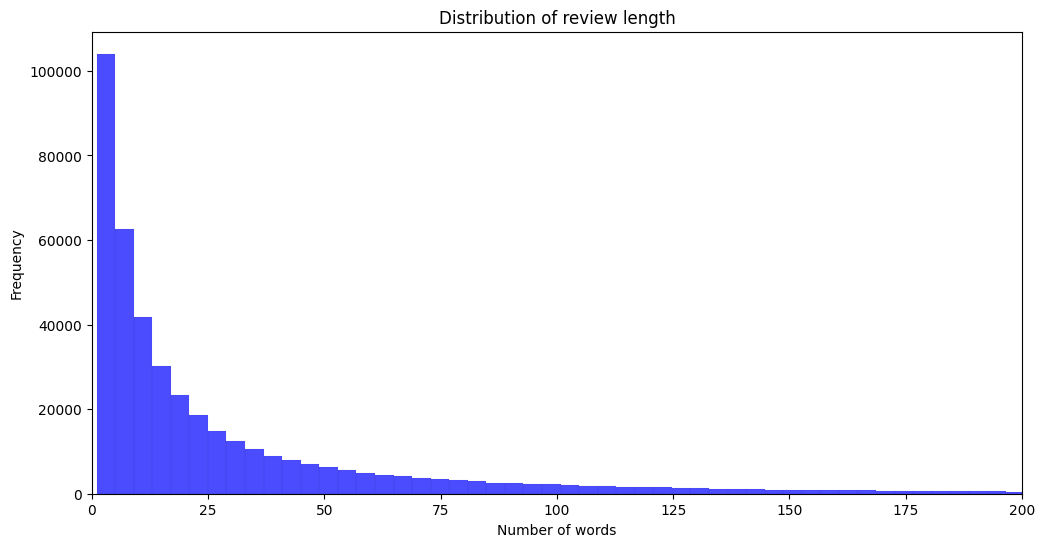

In [12]:
# Plot length of reviews

plt.figure(figsize=(12, 6))
sns.histplot(df["length_reviews"], color="blue", alpha=0.7, bins=2000)
plt.title("Distribution of review length")
plt.xlabel("Number of words")
plt.xlim(0, 200)
plt.ylabel("Frequency")
plt.show()

<Axes: ylabel='length_reviews'>

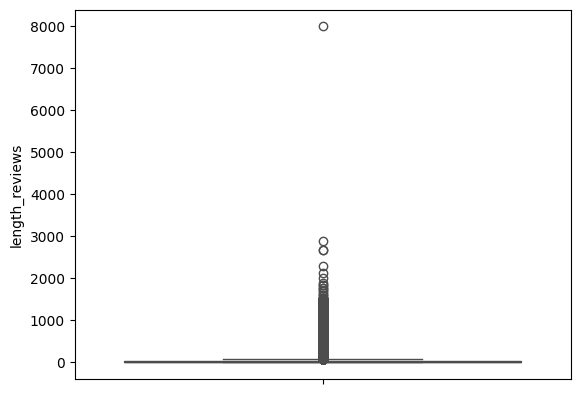

In [13]:
sns.boxplot(df["length_reviews"], color="blue")

In [14]:
df["length_reviews"].describe()

count    433375.000000
mean         40.542842
std          87.019107
min           1.000000
25%           5.000000
50%          13.000000
75%          39.000000
max        7984.000000
Name: length_reviews, dtype: float64

In [15]:
less_than_50 = (df["length_reviews"] < 50).mean() * 100
less_than_100 = (df["length_reviews"] < 100).mean() * 100
less_than_200 = (df["length_reviews"] < 200).mean() * 100

# Print the results
print(f"Percentage of reviews with less than 50 words: {less_than_50:.2f}%")
print(f"Percentage of reviews with less than 100 words: {less_than_100:.2f}%")
print(f"Percentage of reviews with less than 200 words: {less_than_200:.2f}%")

Percentage of reviews with less than 50 words: 79.34%
Percentage of reviews with less than 100 words: 90.07%
Percentage of reviews with less than 200 words: 96.30%
